In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Our Data

import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\gezeu\\Downloads\\archive\\spotify_data_trimmed2.csv')

# Display the first few rows of the dataset
print(df.head())

                 track_id                     artists  \
0  3nqQXoyQOWXiESFLlDF1hG        Sam Smith;Kim Petras   
1  2tTmW7RDtMQtBk7m2rYeSw            Bizarrap;Quevedo   
2  4uUG5RXrOk84mYEfFvj3cK     David Guetta;Bebe Rexha   
3  5ww2BF9slyYgNOk37BlC4u               Manuel Turizo   
4  6Sq7ltF9Qa7SNFBsV5Cogx  Bad Bunny;Chencho Corleone   

                              album_name  \
0              Unholy (feat. Kim Petras)   
1  Quevedo: Bzrp Music Sessions, Vol. 52   
2                        I'm Good (Blue)   
3                             La Bachata   
4                       Un Verano Sin Ti   

                              track_name  popularity  duration_ms  explicit  \
0              Unholy (feat. Kim Petras)         100       156943     False   
1  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937     False   
2                        I'm Good (Blue)          98       175238      True   
3                             La Bachata          98       162637     False 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10000 non-null  object 
 1   artists           10000 non-null  object 
 2   album_name        10000 non-null  object 
 3   track_name        10000 non-null  object 
 4   popularity        10000 non-null  int64  
 5   duration_ms       10000 non-null  int64  
 6   explicit          10000 non-null  bool   
 7   danceability      10000 non-null  float64
 8   energy            10000 non-null  float64
 9   key               10000 non-null  int64  
 10  loudness          10000 non-null  float64
 11  mode              10000 non-null  int64  
 12  speechiness       10000 non-null  float64
 13  acousticness      10000 non-null  float64
 14  instrumentalness  10000 non-null  float64
 15  liveness          10000 non-null  float64
 16  valence           10000 non-null  float64

In [4]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [5]:
print(df.describe())

        popularity   duration_ms  danceability        energy           key  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean      67.36380  2.182414e+05      0.594526      0.638581      5.337300   
std        6.61016  6.509974e+04      0.164729      0.230658      3.563565   
min       59.00000  4.000000e+04      0.000000      0.000020      0.000000   
25%       62.00000  1.776222e+05      0.492000      0.491000      2.000000   
50%       66.00000  2.101865e+05      0.607000      0.676000      5.000000   
75%       71.00000  2.476260e+05      0.716000      0.821000      8.000000   
max      100.00000  1.025280e+06      0.980000      0.998000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -7.757148      0.610600      0.079518      0.278041   
std        5.277013      0.487639      0.080151      0.300681   
min      -43.303000      0.000000    

In [6]:
# Check for missing values
print(df.isnull().sum())

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

In [9]:
# Save the cleaned data
df.to_csv("cleaned_dataset.csv", index=False)

In [10]:
# Descriptive statistics
print(df.describe())

        popularity   duration_ms  danceability        energy           key  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean      67.36380  2.182414e+05      0.594526      0.638581      5.337300   
std        6.61016  6.509974e+04      0.164729      0.230658      3.563565   
min       59.00000  4.000000e+04      0.000000      0.000020      0.000000   
25%       62.00000  1.776222e+05      0.492000      0.491000      2.000000   
50%       66.00000  2.101865e+05      0.607000      0.676000      5.000000   
75%       71.00000  2.476260e+05      0.716000      0.821000      8.000000   
max      100.00000  1.025280e+06      0.980000      0.998000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -7.757148      0.610600      0.079518      0.278041   
std        5.277013      0.487639      0.080151      0.300681   
min      -43.303000      0.000000    

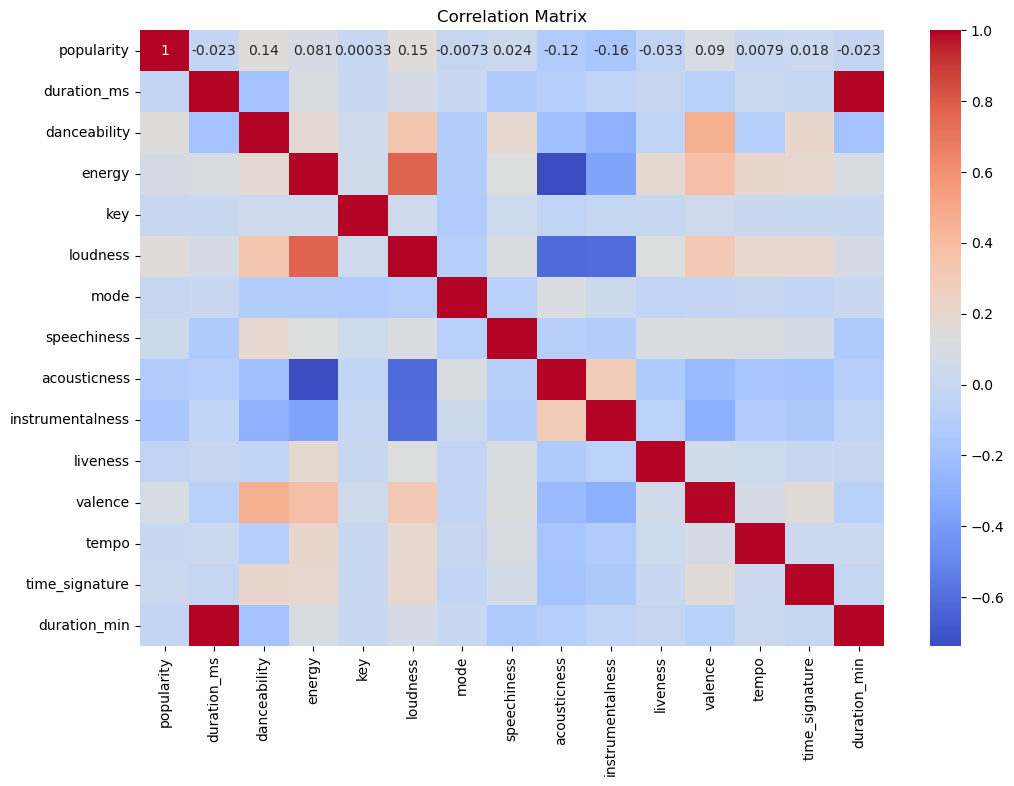

In [11]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Generate correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

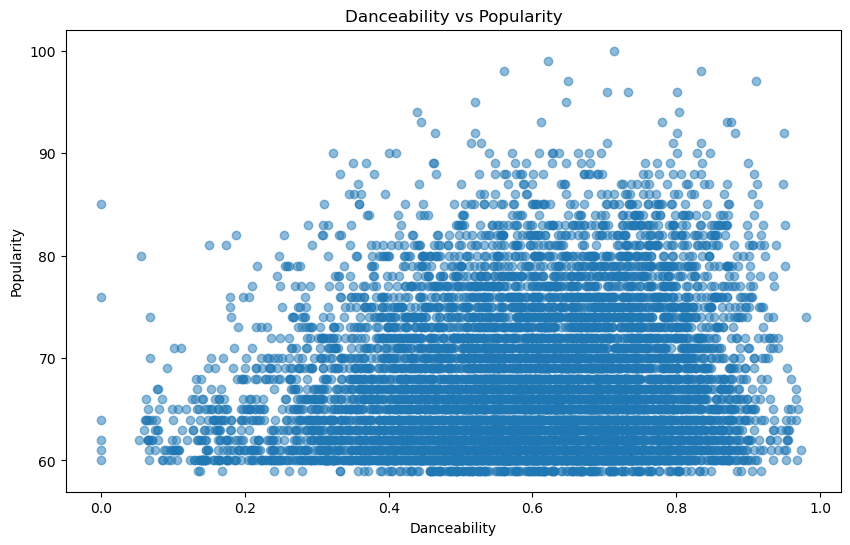

In [12]:
# Scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['popularity'], alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')
plt.show()

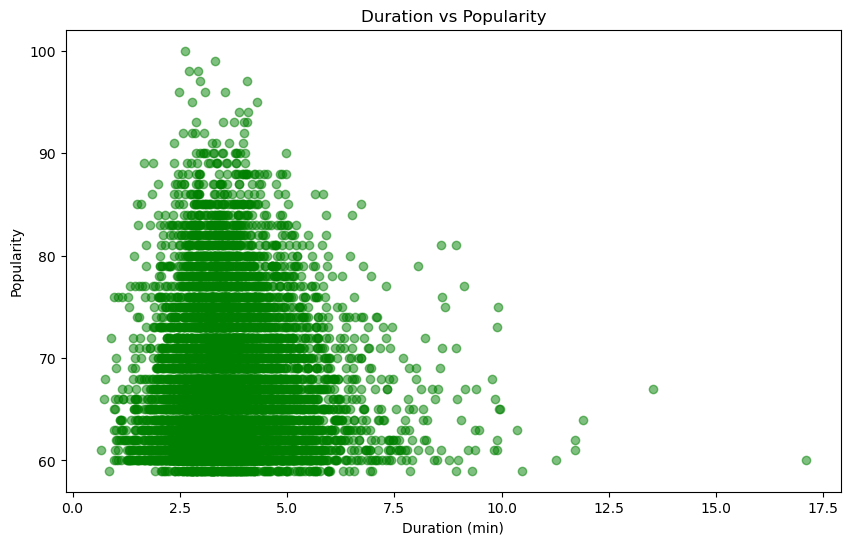

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.5, color='g')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()

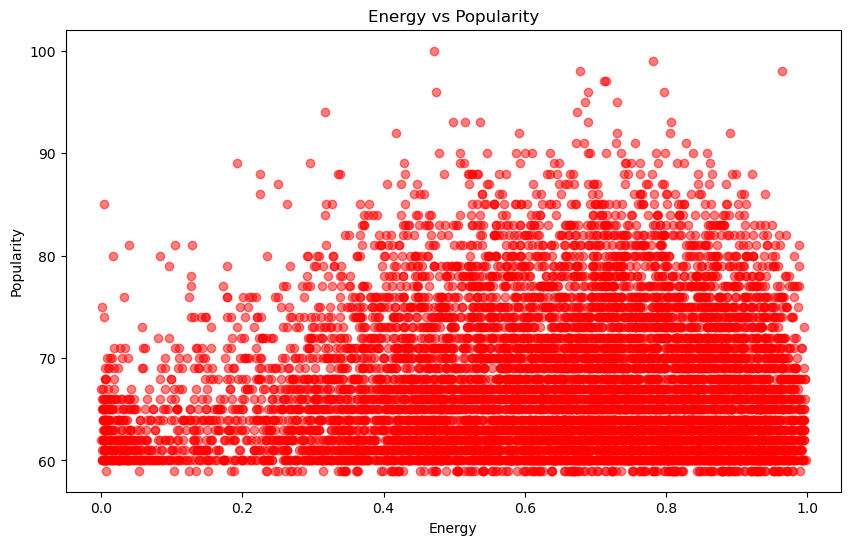

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['energy'], df['popularity'], alpha=0.5, color='r')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity')
plt.show()